In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Load the datasets
concrete_df = pd.read_csv('2_concrete_dry_bumpy_flat_hard.csv')
asphalt_df = pd.read_csv('5_asphalt_dry_flat_hard.csv')
grass_df = pd.read_csv('10_grass_moist_slopy.csv')


In [9]:
concrete_df.head()

,2024-03-09 13:05:16.280,-0.013428,-0.030273,1.049561,-0.045776,-0.045776.1,-0.274658
0,2024-03-09 13:05:16.299,-0.013672,-0.031982,1.046387,-0.091553,-0.137329,-0.442505
1,2024-03-09 13:05:16.319,-0.012695,-0.034668,1.044922,-0.091553,-0.198364,-0.488281
2,2024-03-09 13:05:16.340,-0.011719,-0.034180,1.047607,-0.137329,-0.122070,-0.610352
3,2024-03-09 13:05:16.360,-0.012939,-0.032715,1.047363,-0.137329,-0.076294,-0.640869
4,2024-03-09 13:05:16.379,-0.013428,-0.031006,1.045898,-0.137329,-0.030518,-0.625610


In [10]:
asphalt_df.head()

,2024-03-09 13:58:18.280,-0.070068,-0.056641,1.045898,0.000000,-0.030518,-0.427246
0,2024-03-09 13:58:18.299,-0.063965,-0.055664,1.046387,0.045776,0.030518,-0.854492
1,2024-03-09 13:58:18.319,-0.046387,-0.047852,1.045166,0.061035,-0.076294,-1.098633
2,2024-03-09 13:58:18.340,-0.029785,-0.039551,1.048096,0.061035,-0.091553,-0.976562
3,2024-03-09 13:58:18.360,-0.031006,-0.036865,1.046143,-0.045776,-0.061035,-0.549316
4,2024-03-09 13:58:18.379,-0.047363,-0.040039,1.046875,-0.030518,-0.061035,-0.091553


In [18]:
grass_df.describe()

,-0.034912,0.004150,1.047852,0.015259,-0.076294,-0.213623,accel_magnitude
count,18119.000000,18119.000000,18119.000000,18119.000000,18119.000000,18119.000000,18119.000000
mean,-0.028470,-0.031341,1.048871,-0.118243,-0.046277,0.114369,1.061439
std,0.106845,0.111231,0.203505,8.760291,5.569860,6.191836,0.201174
min,-0.636230,-0.443115,0.054199,-46.722408,-29.098509,-32.119751,0.140389
25%,-0.073242,-0.084229,0.952148,-4.043579,-2.624511,-2.479553,0.967776
50%,-0.037842,-0.056885,1.048340,-0.091553,-0.045776,-0.350952,1.051368
75%,0.023438,0.019043,1.133545,4.196167,2.487183,3.173828,1.147386
max,0.538330,0.823242,2.515137,42.160030,31.372068,28.488157,2.517232


In [19]:
grass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18119 entries, 0 to 18118
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   2024-03-11 10:53:49.259  18119 non-null  object 
 1   -0.034912                18119 non-null  float64
 2   0.004150                 18119 non-null  float64
 3   1.047852                 18119 non-null  float64
 4   0.015259                 18119 non-null  float64
 5   -0.076294                18119 non-null  float64
 6   -0.213623                18119 non-null  float64
 7   accel_magnitude          18119 non-null  float64
 8   Surface                  18119 non-null  object 
dtypes: float64(7), object(2)
memory usage: 1.2+ MB


In [20]:
grass_df.isnull().sum()

2024-03-11 10:53:49.259    0
-0.034912                  0
0.004150                   0
1.047852                   0
0.015259                   0
-0.076294                  0
-0.213623                  0
accel_magnitude            0
Surface                    0
dtype: int64

In [11]:
# Calculate the magnitude of acceleration for the concrete dataset
# This involves the readings from the X, Y, and Z axes of the accelerometer
concrete_df['accel_magnitude'] = np.sqrt(
    concrete_df.iloc[:, 1]**2 +  # Square of X-axis acceleration
    concrete_df.iloc[:, 2]**2 +  # Square of Y-axis acceleration
    concrete_df.iloc[:, 3]**2    # Square of Z-axis acceleration
)

- we Calculate the magnitude of acceleration and gyroscope readings for each dataset

- The magnitude is calculated using the Euclidean norm formula: sqrt(x^2 + y^2 + z^2)

- This combines the accelerometer readings (X, Y, Z) into a single magnitude value

- It simplifies the dataset from 3D motion data to a scalar value representing overall motion intensity


In [12]:
# Calculate acceleration magnitude for concrete dataset
concrete_df['accel_magnitude'] = np.sqrt(concrete_df.iloc[:, 1]**2 + concrete_df.iloc[:, 2]**2 + concrete_df.iloc[:, 3]**2)



In [13]:
 #Calculate acceleration magnitude for asphalt dataset
asphalt_df['accel_magnitude'] = np.sqrt(asphalt_df.iloc[:, 1]**2 + asphalt_df.iloc[:, 2]**2 + asphalt_df.iloc[:, 3]**2)

In [14]:
# Calculate acceleration magnitude for grass dataset
grass_df['accel_magnitude'] = np.sqrt(grass_df.iloc[:, 1]**2 + grass_df.iloc[:, 2]**2 + grass_df.iloc[:, 3]**2)


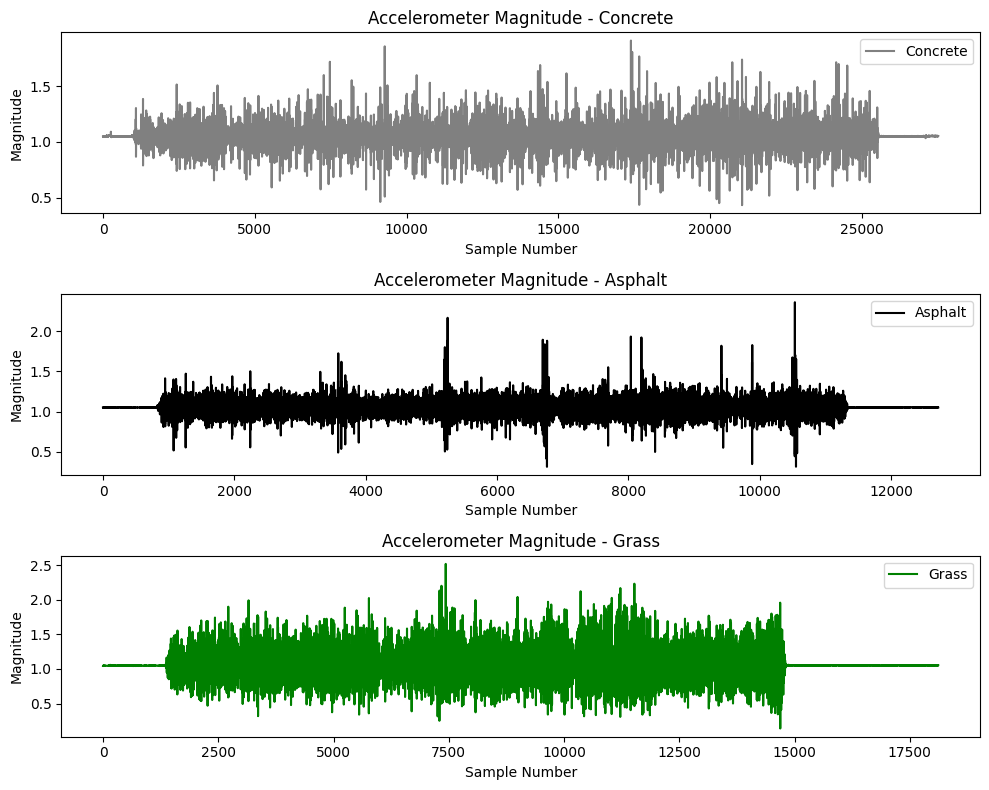

In [15]:
# Step 4: Plotting the accelerometer magnitude for each surface type
# This visualizes the overall motion intensity captured by the accelerometer across different surfaces

# Initialize a plot with 3 rows and 1 column, setting the figure size
fig, ax = plt.subplots(3, 1, figsize=(10, 8))

# Plot accelerometer magnitude for concrete
ax[0].plot(concrete_df['accel_magnitude'], label='Concrete', color='grey')
ax[0].set_title('Accelerometer Magnitude - Concrete')
ax[0].set_xlabel('Sample Number')
ax[0].set_ylabel('Magnitude')
ax[0].legend();

# Plot accelerometer magnitude for asphalt
ax[1].plot(asphalt_df['accel_magnitude'], label='Asphalt', color='black')
ax[1].set_title('Accelerometer Magnitude - Asphalt')
ax[1].set_xlabel('Sample Number')
ax[1].set_ylabel('Magnitude')
ax[1].legend()

# Plot accelerometer magnitude for grass
ax[2].plot(grass_df['accel_magnitude'], label='Grass', color='green')
ax[2].set_title('Accelerometer Magnitude - Grass')
ax[2].set_xlabel('Sample Number')
ax[2].set_ylabel('Magnitude')
ax[2].legend()

# Adjust layout for better readability
plt.tight_layout()
plt.show()


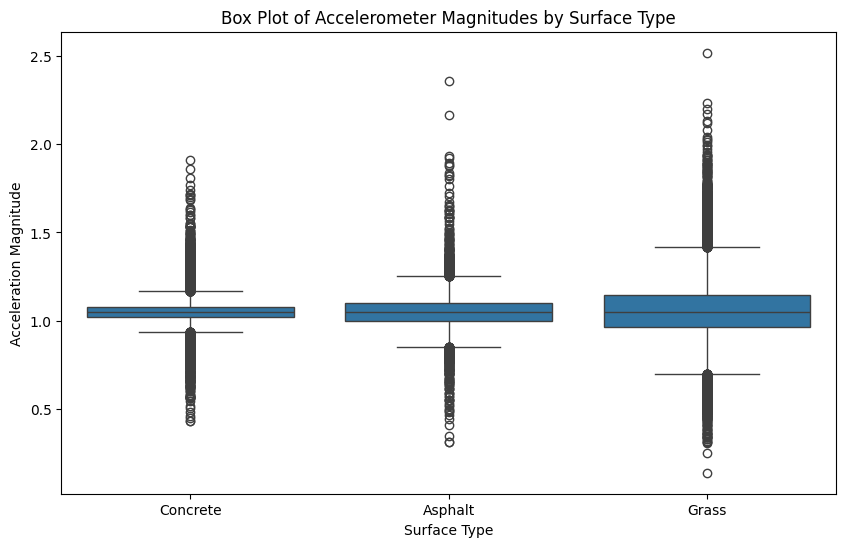

In [17]:
#  Combine the datasets into a single DataFrame with an additional 'Surface' column
concrete_df['Surface'] = 'Concrete'
asphalt_df['Surface'] = 'Asphalt'
grass_df['Surface'] = 'Grass'

# Combine the three DataFrames into one
combined_df = pd.concat([concrete_df[['accel_magnitude', 'Surface']], 
                         asphalt_df[['accel_magnitude', 'Surface']], 
                         grass_df[['accel_magnitude', 'Surface']]], axis=0)

#Create a box plot
plt.figure(figsize=(10, 6))

# Create a box plot for the 'accel_magnitude' column, grouped by the 'Surface' column
sns.boxplot(x='Surface', y='accel_magnitude', data=combined_df)
plt.title('Box Plot of Accelerometer Magnitudes by Surface Type')
plt.xlabel('Surface Type')
plt.ylabel('Acceleration Magnitude')
plt.show()

## We can see the following from the box plot

1- The median acceleration is same for all surfaces, showing similar average movement levels

2-Outliers in acceleration exist across all surfaces, reflecting the natural variability in walking patterns. Factors like step size, tripping, or changes in speed contribute to this variation

3- The interquartile range (IQR) is relatively consistent across all surfaces, indicating a similar distribution of the middle 50% of data.Grass shows a slightly larger IQR, possibly reflecting increased variability due to its uneven surface

4-Grass has a broader range and more outliers, possibly because it's less smooth than concrete or asphalt.

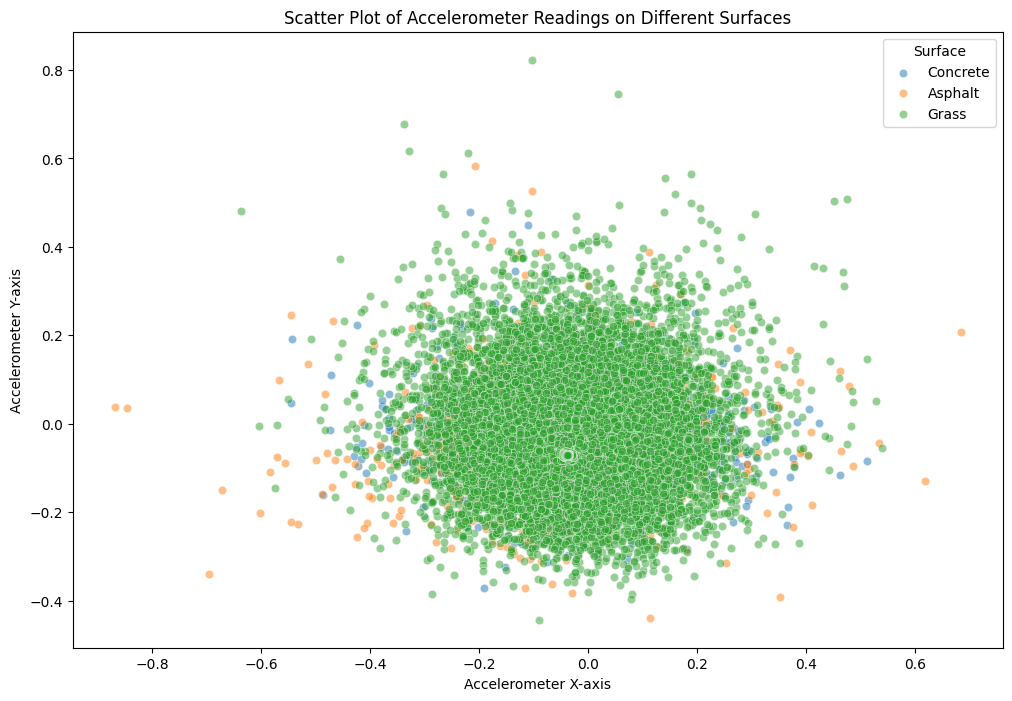

In [23]:
# Plot the scatter plot using seaborn, with an alpha set to 0.5 for better visibility
plt.figure(figsize=(12, 8))
sns.scatterplot(x=concrete_df.iloc[:, 1], y=concrete_df.iloc[:, 2], label='Concrete', alpha=0.5)
sns.scatterplot(x=asphalt_df.iloc[:, 1], y=asphalt_df.iloc[:, 2], label='Asphalt', alpha=0.5)
sns.scatterplot(x=grass_df.iloc[:, 1], y=grass_df.iloc[:, 2], label='Grass', alpha=0.5)
plt.title('Scatter Plot of Accelerometer Readings on Different Surfaces')
plt.xlabel('Accelerometer X-axis')
plt.ylabel('Accelerometer Y-axis')
plt.legend(title='Surface')
plt.show()